In [1]:
import pandas as pd

In [2]:
df = pd.read_csv ('marketing_customer_analysis.csv')

In [3]:
# First of all, let's take a look to see our data frame

df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
#Show the dataframe shape.

df.shape

(10910, 26)

In [5]:
# Standardize header names.

df.columns= df.columns.str.lower() # Put all column headers in lower case
df.columns = df.columns.str.replace(' ', '_') # Eliminate blank spaces
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [6]:
# Which columns are numerical? And categorical? First we check the data types of each column.

df.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

To be properly defined, the following variables should be:

- Numerical: unnamed:_0, customer_lifetime_value, number_of_open_complaints, income, monthly premiu auto, months since last claim, months since policy inception, number of policies, total_claim_amount
- Categorical: the rest 

In [7]:
# Check and deal with NaN values.

df.isnull().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [8]:
# Calculate the mean and median and analyze the stdev of the numerical columns that have nulls to see if it has sense to substitute them for one of the values

# number_of_open_complaints
df_nooc_median = df['number_of_open_complaints'].median()
df_nooc_mean = df['number_of_open_complaints'].mean()
df_nooc_stdev = df['number_of_open_complaints'].std()
print(df_nooc_stdev) # As stdev is low, it is logical to substitute NaN by the mean.

0.9124571814676624


In [9]:
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(df_nooc_median)

In [10]:
# months_since_last_claim
df_mslc_median = df['months_since_last_claim'].median()
df_mslc_mean = df['months_since_last_claim'].mean()
df_mslc_stdev = df['months_since_last_claim'].std()
print(df_mslc_stdev) # As stdev is quite high, it is logical to substitute NaN by the median.

10.080348786080851


In [11]:
df['months_since_last_claim'] = df['months_since_last_claim'].fillna(df_mslc_median)

In [12]:
# The null values in categorical columns will be transformed to 'unknown'

df['state'] = df['state'].fillna('unknown') #state
df['response'] = df['response'].fillna('unknown') #response
df['vehicle_class'] = df['vehicle_class'].fillna('unknown') #vehicle_class
df['vehicle_size'] = df['vehicle_size'].fillna('unknown') #vehicle_size
df['vehicle_type'] = df['vehicle_type'].fillna('unknown') #vehicle_type

In [13]:
# Check if all null values have been removed (False means there are no null values)

df.isnull().values.any()

False

In [14]:
# Now that we have dealed with the NaNs, let's transform the wrong data types:
# 'Effective to date' should be a datetime data type
# 'Months since last claim' should be an integer
# 'Number_of_open_complaints' should be an integer

df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce') 
df['number_of_open_complaints'] = df['number_of_open_complaints'].astype('int', errors='ignore')
df['months_since_last_claim'] = df['months_since_last_claim'].astype('int', errors='ignore')

In [15]:
df.dtypes

unnamed:_0                                int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                        

In [16]:
# I decided to eliminate the column "unnamed:_0" as it brings no value, it's a copy of the automatic index.

df.drop(['unnamed:_0'], axis = 1, inplace = True) 

In [17]:
# Extract the months from the dataset and store them in a separate column.

df['month']=pd.DatetimeIndex(df['effective_to_date']).month

In [18]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type', 'month'],
      dtype='object')

In [19]:
# Filter the data to show only the information for the first quarter (we look only january and february because there is no data from march)

df_1stq = df.query('month <=2')

In [20]:
df_1stq['month'].unique() # There is no data from march

array([2, 1])

In [21]:
df_1stq

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [22]:
# In order to define a function, I will read again the file to have the original df to work on

In [23]:
def clean(filename, numcolumn1, numcolumn2, catcolumn1, catcolumn2, catcolumn3, catcolumn4, catcolumn5, datecolumn):
    
    import pandas as pd
    dfF = pd.read_csv (filename) #read file
    
    shape = dfF.shape #show df shape
    print(shape)
    
    dfF.columns= dfF.columns.str.lower() #put all column headers in lower case
    dfF.columns = dfF.columns.str.replace(' ', '_') #eliminate blank spaces
    nulls = dfF.isnull().sum() #show null values
    print(nulls) 
    
    dfF_numcolumn1_median = dfF[numcolumn1].median() #calculate median
    dfF[numcolumn1] = dfF[numcolumn1].fillna(dfF_numcolumn1_median) #I have simplified it, it always transforms nulls to the median.
    dfF_numcolumn2_median = dfF[numcolumn2].median() #calculate median
    dfF[numcolumn2] = dfF[numcolumn2].fillna(dfF_numcolumn2_median) #I have simplified it, it always transforms nulls to the median.
    dfF[catcolumn1] = dfF[catcolumn1].fillna('unknown') #nan of a categorical column to "unknown"
    dfF[catcolumn2] = dfF[catcolumn2].fillna('unknown') #nan of a categorical column to "unknown"
    dfF[catcolumn3] = dfF[catcolumn3].fillna('unknown') #nan of a categorical column to "unknown"
    dfF[catcolumn4] = dfF[catcolumn4].fillna('unknown') #nan of a categorical column to "unknown"
    dfF[catcolumn5] = dfF[catcolumn5].fillna('unknown') #nan of a categorical column to "unknown"
    nulls = dfF.isnull().sum() #check null values
    print(nulls) 
    
    dfF[datecolumn]=pd.to_datetime(dfF[datecolumn], errors='coerce') #change data type
    dfF[numcolumn1] = dfF[numcolumn1].astype('int', errors='ignore') #change data type
    dfF[numcolumn2] = dfF[numcolumn2].astype('int', errors='ignore') #change data type
    dfF.info()
    
    dfF['month']=pd.DatetimeIndex(dfF[datecolumn]).month # Extract the months from the dataset and store them in a separate column.
    dfF_1stq = dfF.query('month <=3') #Filter data from 1st quarter and show new df
    print(dfF_1stq)
    
    

In [24]:
clean('marketing_customer_analysis.csv', 'number_of_open_complaints', 'months_since_last_claim', 'state', 'response', 'vehicle_class', 'vehicle_size', 'vehicle_type', 'effective_to_date')

(10910, 26)
unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482


# Lab Customer Analysis Round 3

In [25]:
#pandas was already imported

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Show df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

In [27]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.082401,48.091934,0.361962,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,9.787208,27.940675,0.890134,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


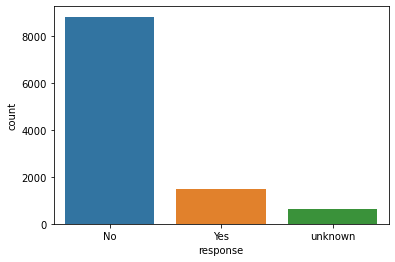

In [28]:
#Show a plot of the total number of responses(for each response type - "Yes"/"No")

sns.countplot(x='response', data=df);

In [ ]:
# Show a plot of the rate of the response types by each Sales Channel

    # A bar plot, a cat plot or stacked plot would work

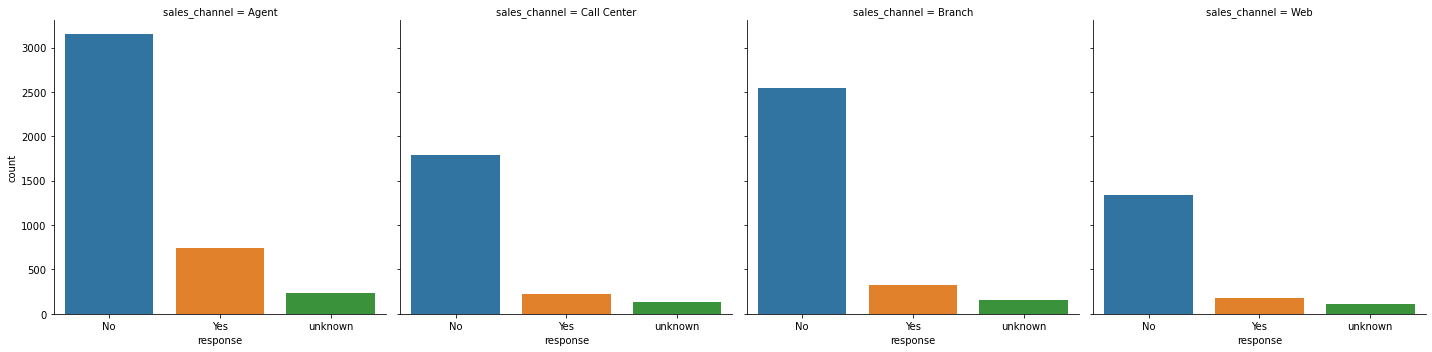

In [32]:
sns.catplot(x='response', col='sales_channel', data=df, kind='count');

# We don't use an "y" because there is no real number in our data. Instead, we use "kind" because we do an operation: count.
# Col represents the different groups in the plot.

In [39]:
# Show a plot of the distribution of the Total Claim Amount, broken down by response type.

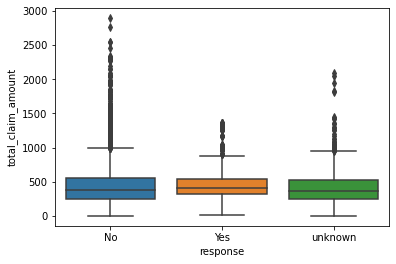

In [42]:
# Box plot

sns.boxplot(x='response', y='total_claim_amount', data=df);

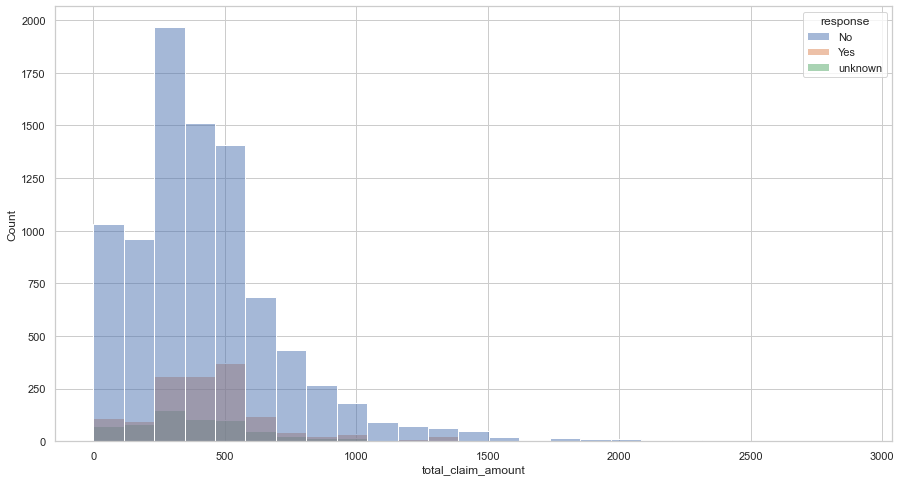

In [46]:
# Distribution plot (histogram)

# To define an overall seaborn size and display of the plots
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style('whitegrid')

sns.histplot(data=df, x='total_claim_amount', hue='response', bins=25);

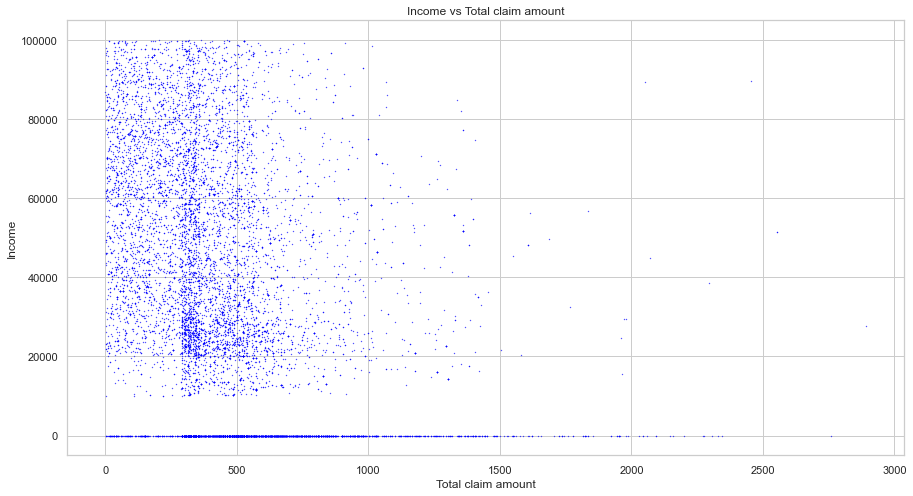

In [61]:
# Distribution plot (scatter plot) with matplotlib

plt.scatter(x='total_claim_amount', y='income', data=df, s=0.1, c='blue');
plt.xlabel('Total claim amount');
plt.ylabel('Income');
plt.title('Income vs Total claim amount');

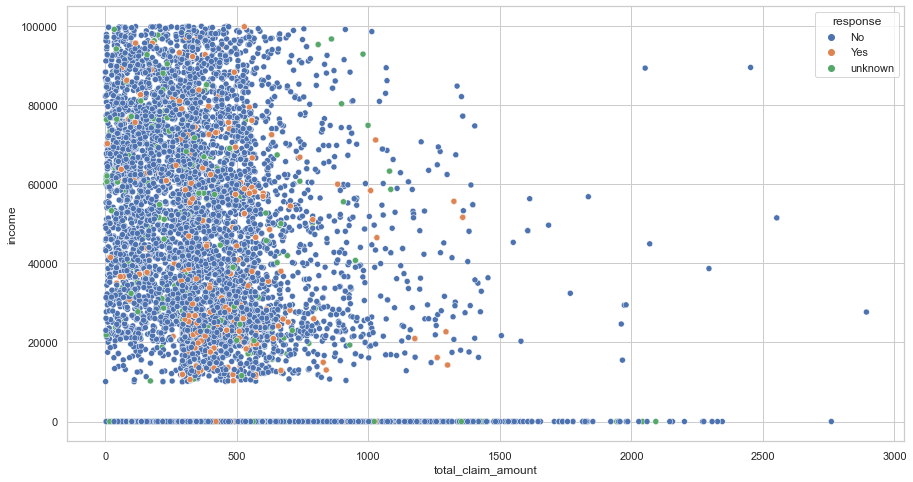

In [62]:
sns.scatterplot(data=df, x="total_claim_amount", y="income", hue='response');